##What are differential equations?
>It is an equation consisting of a function as well as one or more of its derivatives. The applications are relevant in the field of Physics

## How do we solve it?
> The solution is to find the function or the set of functions either numerically or through python libraries

* The order of the differential equation = to the highest order of the derivative in the equation
* A differential equaion may appear in these forms:

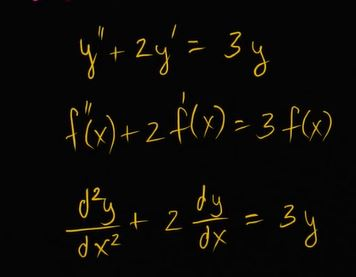

In [ ]:
from sympy import *
import sympy as smp
smp.init_printing(pretty_print=True)

## Differential equation basics:
* how to take derivatives of a general function

In [ ]:
x,f = smp.symbols('x f')

print(type(f))

f = smp.lambdify(x,f)
f0 = f(x)
print(type(f))


f1 = smp.Derivative(f0,x)
display(f1)

print()

f2 = smp.Derivative( f1 , x)
display(f2)


<class 'sympy.core.symbol.Symbol'>
<class 'function'>


d    
──(f)
dx   

  2   
 d    
───(f)
  2   
dx    

In [ ]:
y = smp.Function('y')  # making y a general function
display(y)
print(type(y))

print()

y1 = smp.Derivative(y(x), x)       #obtaining nth derivative of function y which is a function of x
display(y1)
print(type(y1))

y

<class 'sympy.core.function.UndefinedFunction'>



d       
──(y(x))
dx      

<class 'sympy.core.function.Derivative'>


In [ ]:
y = smp.Function('y')(x) # making y a general function which depends on  x
display(y)

print()

y1 = smp.diff(y, x)        #getting the derivative of y
display(y1)


# you will get an error if you try to define y=y(x) and then obtain Derivative of y(x)

y(x)

d       
──(y(x))
dx      

In [ ]:
p = smp.symbols('p', cls=Function)
display(p)
print(type(p))

print()

p1 = smp.diff(p(x), x)        # or smp.Derivative(p(x),x)
display(p1)
print(type(p1))

p

<class 'sympy.core.function.UndefinedFunction'>



d       
──(p(x))
dx      

<class 'sympy.core.function.Derivative'>


## Creating a differential eqn with a general function

In [ ]:
#creating an ODE, ordinary differential equation
g = smp.Function('g')(x)
#g
g1=smp.diff(g,x)
g2=smp.diff(g,x,2)
diff_eq = smp.Eq(g*3 + 2*g1, g2)
diff_eq

                        2      
           d           d       
3⋅g(x) + 2⋅──(g(x)) = ───(g(x))
           dx           2      
                      dx       

In [ ]:
diff_eq.rhs      # getting the right hand side of the ode

  2      
 d       
───(g(x))
  2      
dx       

In [ ]:
diff_eq.lhs      # getting the left hand side of the ode

           d       
3⋅g(x) + 2⋅──(g(x))
           dx      

In [ ]:
#creating a PDE, partial differential equation

z = smp.symbols("z")

pde = smp.Function('g')(x,z)

pde1=smp.diff(pde,x)
pde2=smp.diff(pde,z,2)

pd_eq = smp.Eq(pde*3 + 2*pde1, pde2)
pd_eq

                              2         
              ∂              ∂          
3⋅g(x, z) + 2⋅──(g(x, z)) = ───(g(x, z))
              ∂x              2         
                            ∂z          

In [ ]:
pd_eq.rhs

  2         
 ∂          
───(g(x, z))
  2         
∂z          

In [ ]:
pd_eq.lhs

              ∂          
3⋅g(x, z) + 2⋅──(g(x, z))
              ∂x         

In [ ]:
#Ordinary differential equations (ODE) are equations where the derivatives are taken with respect to only one variable.
#That is, there is only one independent variable.
#Partial differential equations (PDE) are equations that depend on partial derivatives of several variables.

## Solutions

In [ ]:
# General solution

smp.dsolve( smp.Eq(g*3 + 2*g1, g2) , g )

#dsolve returns an instance of Eq, this is because in general, solutions to differential equations cannot be solved explicitly for the function.

           -x       3⋅x
g(x) = C₁⋅ℯ   + C₂⋅ℯ   

In [ ]:
y = Function('y')(x)
expr = Eq(diff(y,x,1), 25*x*(1-y))
display(expr)

print()

display(dsolve(expr))

d                         
──(y(x)) = 25⋅x⋅(1 - y(x))
dx                        

                2     
           -25⋅x      
           ───────    
              2       
y(x) = C₁⋅ℯ        + 1

## First order differential equations with condition:


Reference model
\begin{cases} y' = f(x,y) \\ y(0)= y_0\end{cases}

Example
Differential equation:

\begin{cases} y' = -{y^2\over x^2} \\ y(1)= {1\over 2}\end{cases}


The condition here is :  y(1)= 1/2

In [ ]:
# General solution

y = smp.Function('y')
y1 = smp.Derivative(y(x), x)

eqdiff = y1 + (y(x)**2)/x**2  # eqdiff = smp.Eq(y1,-(y(x)**2)/x**2)
#display(eqdiff)

# Solution
sol = smp.dsolve(eqdiff, y(x))                   # your answer is going to be wildly different if you use 'solve' instead of 'dsolve'

# Print
smp.pprint(sol)

         -x    
y(x) = ────────
       C₁⋅x + 1


In [ ]:
# Solution with the given initial conditions
sol = smp.dsolve(eqdiff, y(x),ics={y(1): '1/2'}) #initial conditions
pprint(sol)
#try sol = smp.dsolve(eqdiff, y,ics={y.subs(x,1): 1/2}) if there is error

         -x   
y(x) = ───────
       1 - 3⋅x


In [ ]:
sol.rhs

  -x   
───────
1 - 3⋅x

$dy/dt = y , y(0)= 1$

In [ ]:
t=smp.symbols('t')
y=smp.Function('y')(t)

diff_eqt = smp.Eq( smp.diff(y,t) , y )
#display(diff_eqt)

smp.dsolve(diff_eqt, y, ics={y.subs(t,0):1})

        t
y(t) = ℯ 

## Second Order DE

**Reference model**

\begin{cases} y'' + a y' + b y= f(x) \\ y(0)= y_0 \\ y'(0)= y_0'\end{cases}

*Example*

**Differential equation:**

\begin{cases} y'' + 9y = 0\,, \\ y\left({\pi\over 4}\right)= 0\,, \\ y'\left({\pi\over 4}\right)= 3\sqrt{2}\,.\end{cases}


**General solution:**

y =
​
 C1 cos(3x)+C2 sin(3x)
  

**​Solution (with initial condition):**

y= − cos(3x) − sin(3x)




​




**Initialization and symbolic variables**

In [ ]:
#Some common variables declaration
x= smp.symbols('x')

y= smp.Function('y')

y2 = smp.Derivative(y(x),x,2)

sec_de_eq = y2 + 9*y(x)

display(sec_de_eq)

           2      
          d       
9⋅y(x) + ───(y(x))
           2      
         dx       

**General solution**

In [ ]:
#General solution without the initial value
g_s = smp.dsolve(sec_de_eq)
pprint(g_s)

y(x) = C₁⋅sin(3⋅x) + C₂⋅cos(3⋅x)


**Solution with the initial condition**

In [ ]:
#Solution with the given initial condition

x0 = smp.pi/4     # using a variable to store pi/4
boundary = {y(x0):0, y(x).diff(x).subs(x,x0): 3*smp.sqrt(2)}   #using a variable to store the conditions


sol = smp.dsolve(sec_de_eq, y(x), ics=boundary)

display(sol)

y(x) = -sin(3⋅x) - cos(3⋅x)

## THIRD ORDER ODE

 $$  \frac{d^3f}{dx^3}  = x, f(0)= 1, f(1)=2, f'(2)= 3 $$

In [ ]:
f=smp.symbols('f', cls=Function)  # same as writing f=smp.Function('f')

expr = smp.Eq(diff(f(x),x,3),x)   # definiting the expression

display(expr)

  3          
 d           
───(f(x)) = x
  3          
dx           

In [ ]:
smp.dsolve(expr)         #general solution / blueprint of what the answer should look like

                            4
                       2   x 
f(x) = C₁ + C₂⋅x + C₃⋅x  + ──
                           24

In [ ]:
# boundary is variable holding a dictionary datatype consisting of keys:values pairs of "what to substitute: what to substitute with "
# f(x).subs(x,0): 1 means when the value of x in f function is being substituted by 0, the result is 1
# for f'(2)=3, we may write  diff(f(x),x).subs(x,2): 3

boundary = {f(x).subs(x,0):1,f(x).subs(x,1):2, diff(f(x),x).subs(x,2):3}      # you can also write {f(0):1,f(1):2, f(x).diff(x).subs(x,2):3}
smp.dsolve(expr, ics=boundary)

        4       2           
       x    17⋅x    13⋅x    
f(x) = ── + ───── + ──── + 1
       24     72     18     

In [ ]:
# reverse calculation
# differentiating the rhs of the solution 3 times to see if we get "x"
# because the question was :  diff( f , x , 3 ) = x

f_x=smp.dsolve(expr, ics=boundary)
diff(f_x.rhs,x,3)

x

# System of Differential equation

* also known as coupled DE

### $dx/dt = 3y+ 2t $
### $dy/dt = -x + 2y + 3$

In [ ]:
t = symbols('t')
# x, y = symbols('x y', cls = Function)
x = Function('x') (t)
y = Function('y') (t)

Eq1 = Eq(diff(x,t), 3*y+2*t)
Eq2 = Eq(diff(y,t), -x+2*y+3)

# note that x and y are functions of t, not individual variables

display(Eq1)
display(Eq2)

d                      
──(x(t)) = 2⋅t + 3⋅y(t)
dt                     

d                            
──(y(t)) = -x(t) + 2⋅y(t) + 3
dt                           

In [ ]:
expr = [Eq1, Eq2]
solution = dsolve([Eq1, Eq2])

In [ ]:
dsolve(Eq2)

⌠                   ⌠                    -2⋅t     
⎮       -2⋅t        ⎮       -2⋅t      3⋅ℯ         
⎮ x(t)⋅ℯ     dt - 2⋅⎮ y(t)⋅ℯ     dt + ─────── = C₁
⌡                   ⌡                    2        

In [ ]:
display(solution)

⎡                2                2                                           
⎢         4⋅t⋅sin (√2⋅t)   4⋅t⋅cos (√2⋅t)                 t                   
⎢x(t) = - ────────────── - ────────────── - (C₁ - √2⋅C₂)⋅ℯ ⋅sin(√2⋅t) + (√2⋅C₁
⎣               3                3                                            

                            2               2                                 
        t             25⋅sin (√2⋅t)   25⋅cos (√2⋅t)               t           
 + C₂)⋅ℯ ⋅cos(√2⋅t) + ───────────── + ─────────────, y(t) = - C₁⋅ℯ ⋅sin(√2⋅t) 
                            9               9                                 

                           2                2              2              2   
      t             2⋅t⋅sin (√2⋅t)   2⋅t⋅cos (√2⋅t)   4⋅sin (√2⋅t)   4⋅cos (√2
+ C₂⋅ℯ ⋅cos(√2⋅t) - ────────────── - ────────────── - ──────────── - ─────────
                          3                3               9              9   

   ⎤
⋅t)⎥
───⎥
   ⎦

In [ ]:
for i in range(2):
  display(solution[i])


                2                2                                            
         4⋅t⋅sin (√2⋅t)   4⋅t⋅cos (√2⋅t)                 t                    
x(t) = - ────────────── - ────────────── - (C₁ - √2⋅C₂)⋅ℯ ⋅sin(√2⋅t) + (√2⋅C₁ 
               3                3                                             

                           2               2      
       t             25⋅sin (√2⋅t)   25⋅cos (√2⋅t)
+ C₂)⋅ℯ ⋅cos(√2⋅t) + ───────────── + ─────────────
                           9               9      

                                                    2                2        
             t                 t             2⋅t⋅sin (√2⋅t)   2⋅t⋅cos (√2⋅t)  
y(t) = - C₁⋅ℯ ⋅sin(√2⋅t) + C₂⋅ℯ ⋅cos(√2⋅t) - ────────────── - ────────────── -
                                                   3                3         

      2              2      
 4⋅sin (√2⋅t)   4⋅cos (√2⋅t)
 ──────────── - ────────────
      9              9      

With Boundary Condition

#### $x(0)=1, y'(0)=2$

In [ ]:
boundary = {x.subs(t,0): 1, diff(y,t).subs(t,0): 2}
solution = dsolve(expr, ics = boundary)
for i in range(2):
  display(solution[i])

                2                2                t                 t         
         4⋅t⋅sin (√2⋅t)   4⋅t⋅cos (√2⋅t)   14⋅√2⋅ℯ ⋅sin(√2⋅t)   16⋅ℯ ⋅cos(√2⋅t
x(t) = - ────────────── - ────────────── + ────────────────── - ──────────────
               3                3                  9                   9      

          2               2      
)   25⋅sin (√2⋅t)   25⋅cos (√2⋅t)
─ + ───────────── + ─────────────
          9               9      

                2                2                t                t          
         2⋅t⋅sin (√2⋅t)   2⋅t⋅cos (√2⋅t)   10⋅√2⋅ℯ ⋅sin(√2⋅t)   4⋅ℯ ⋅cos(√2⋅t)
y(t) = - ────────────── - ────────────── + ────────────────── + ──────────────
               3                3                  9                  9       

        2              2      
   4⋅sin (√2⋅t)   4⋅cos (√2⋅t)
 - ──────────── - ────────────
        9              9      

## Ordinary Differential Equation Integrator (ODEINT)

* Differential equations are solved in Python with the Scipy.integrate package using function ODEINT.
* ODEINT requires three inputs:


\begin{cases}  y = odeint(model, y0, t) \end{cases}



1. model: Function name that returns derivative values at requested y and t values as dydt = model(y,t)
2. y0: Initial conditions of the differential states
3. t: Time points at which the solution should be reported. Additional internal points are often calculated to maintain accuracy of the solution but are not reported.

Differential equation:

\begin{cases} v' = -{v^2\over t^2} \\ v(0)= {1\over 2}\end{cases}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


**Numerical solution in a given interval**

In [ ]:
# Numerical solution in Python (SciPy)

# Model
def model(v, t):
    dvdt = -v**2/t**2          # given an equaion where v'(t) = -v**2/t**2
    return dvdt

[ 1.          1.09090909  1.18181818  1.27272727  1.36363636  1.45454545
  1.54545455  1.63636364  1.72727273  1.81818182  1.90909091  2.
  2.09090909  2.18181818  2.27272727  2.36363636  2.45454545  2.54545455
  2.63636364  2.72727273  2.81818182  2.90909091  3.          3.09090909
  3.18181818  3.27272727  3.36363636  3.45454545  3.54545455  3.63636364
  3.72727273  3.81818182  3.90909091  4.          4.09090909  4.18181818
  4.27272727  4.36363636  4.45454545  4.54545455  4.63636364  4.72727273
  4.81818182  4.90909091  5.          5.09090909  5.18181818  5.27272727
  5.36363636  5.45454545  5.54545455  5.63636364  5.72727273  5.81818182
  5.90909091  6.          6.09090909  6.18181818  6.27272727  6.36363636
  6.45454545  6.54545455  6.63636364  6.72727273  6.81818182  6.90909091
  7.          7.09090909  7.18181818  7.27272727  7.36363636  7.45454545
  7.54545455  7.63636364  7.72727273  7.81818182  7.90909091  8.
  8.09090909  8.18181818  8.27272727  8.36363636  8.45454545  8.545

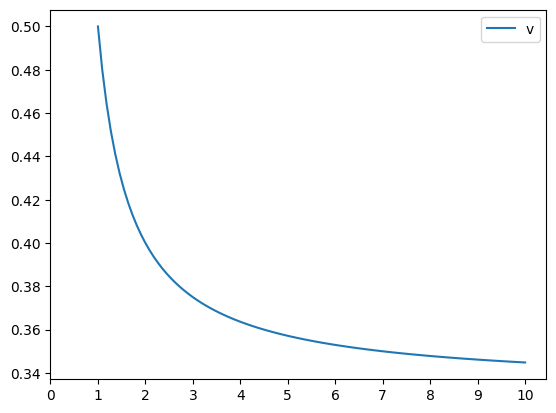

In [ ]:
# Solution
t = np.linspace(1, 10, 100)           # range of t values
v0 = 1/2                              # ics
sol = odeint(model, v0, t)

print(t)
print(sol)
plt.plot(t,sol,label="v")
plt.legend()
plt.xticks(np.arange(11))


plt.savefig("ode_num-1.svg")   # Save in svg format
plt.show()                     #saves to backend

#The return value of odeint is the computed solution at the requested time values. That is, after this call
#An array containing the value of v for each desired time in t, with the initial value v0 in the first row.

# Euler method (aka numerical method)


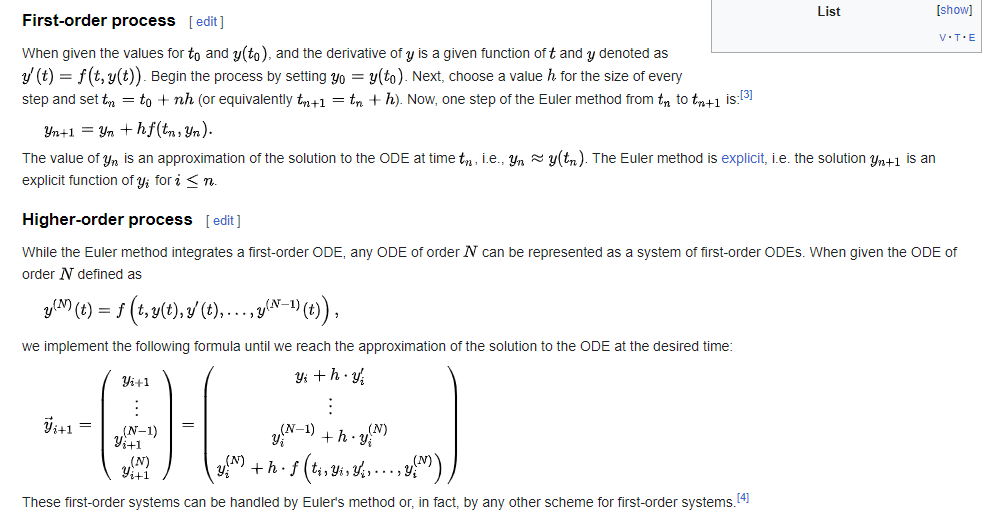

* the basic idea is to set a starting point y_0 and at the corresponding point t_0, these are initial conditions
* Then we perform an iterative method to find y at (t+h), h is a very small increment
* The formula used is : $$ y(t + h) = y(t) + h* f(y,t) $$
* Here, $ y'(t) = f(y,t) $, so for every iteration, where y(t+h), we are adding the increment*slope to the previous point on the graph
* If we are to plot the graph based on the points obtained from this method, t would be the x-axis

* CURRENT VALUE = PREVIOUS VALUE + STEP SIZE*DERIVATIVE



##$\frac{dy}{dx} = y , y(0)=1$

[0.    0.003 0.006 ... 2.994 2.997 3.   ]
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
[ 1.          1.003       1.006009   ... 19.87609914 19.93572744
 19.99553462]


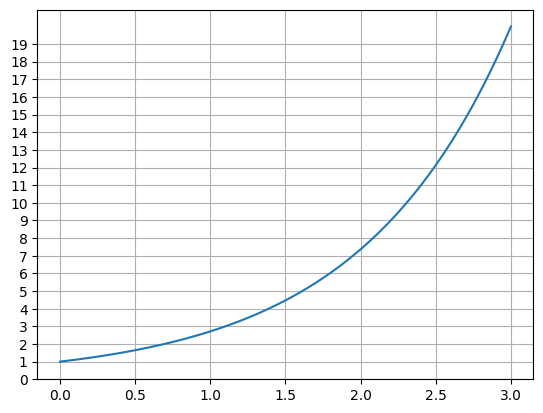

In [ ]:
a = 0                # starting
b = 3                # ending
N = 1001             # no. of divisions / points
h = (b-a)/(N-1)      # step size, follow this formula

x = np.linspace(a,b,N)
print(x)

y = 0*x              # creating an equal size array consisting of all zeroes
print(y)

y[0] = 1            # declaring what we want the initial value to be
print(y)

#print(x)
#print(y)

for i in range(1,N):                  #figuring out the other values of the given DE
  y[i] = y[i-1] + h*(y[i-1])           #calculating the next value of y, using the previous value + step*slope
  #print("i:",i,"y[i]:",y[i],"y[i-1]:",y[i-1])

print(y)

plt.plot(x,y)
plt.yticks(np.arange(20))
plt.grid()
plt.show()


#$dy/dx= e^x sin(x+y), y(0)=1$

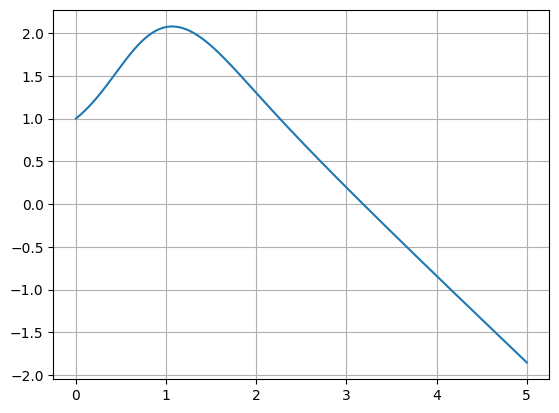

In [ ]:
f = lambda m, n : (smp.exp(m))*sin(m+n)

a = 0
b = 5
N = 1001
h = (b-a)/(N-1)         # step size, follow this formula

x= np.linspace(a,b,N)

y = 0* x                # creating an equal size array consisting of all zeroes
y[0] = 1
#print(y)


# y[0] = 1, here 0 is the index of the y array
# x[0] = 0, based on the array created by linspace
# The plot is made by corresponding coordinates (x[n],y[n])
# So when x=0, then y=1, as they are the corresponding 0th indexes, implying that they are the corresponding coordinates
# For further issues regarding coordinates, try to 'print(x[n],y[n]) for i in range(0,N)'


for i in range(1,N):
  y[i] = y[i-1] + h * f(x[i-1], y[i-1])

#print(y)
plt.plot(x,y)
plt.grid()
plt.show()


explanataion='''
y1 = y0 + h*f(x0,y0)
y2 = y1 + h*f(x1,y1)
.
.
.
.
y1000= y999 + h*f(x999,y999)
'''

#$\frac{d^2x}{dt^2} + 16x =sin(3t), x(0)= 2, x'(0) = 0$

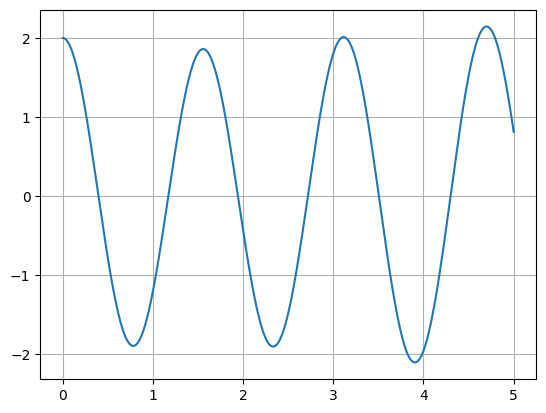

In [ ]:
# The question contains a second order DE, so we need to run the iterator to get the values of dx/dt first then the values of x(t)

# m and n are local variables, which only exist within this line, they are only parameters/arguments here
f = lambda m, n : sin(3*m) - 16*n

a = 0                           # start
b = 5                           # stop
N = 10001                       # no. of points/divisions
h = (b-a)/(N-1)                 # step size, follow this formula

t = np.linspace(a,b,N)           # time points= [0.0   0.0005 ....  4.9995 5.0]


# we need to make 2 arrays, one to find x(t) solutions, another for dx/dt solutions
x = 0* t
v = 0* t                                 # v =dx/dt

x[0] = 2          # x[0] = 2, which corresponds to t[0]=0
v[0] = 0          # v[0] = 0, which corresponds to t[0]=0


for i in range(1,N):
  v[i] = v[i-1] + h*f(t[i-1], x[i-1])   # firstly we need to determine dx/dt, aka v(t)
  x[i] = x[i-1] + h*v[i]                # secondly, we use the value of dx/dt calculate the value of x(t)


plt.plot(t,x)
plt.grid()
plt.show()



# v[0] = & x[0] = 2, here 0 is the index of the v & x array, and also the corresponding coordinates to t[0]=0
# t[0] = 0, based on the array created by linspace
# The plot is made by corresponding coordinates (t[n],yx[n]), &  (t[n],v[n])

# For further issues regarding coordinates, try to 'print(t[n],yx[n]) or (t[n],v[n]) for i in range(0,N)'


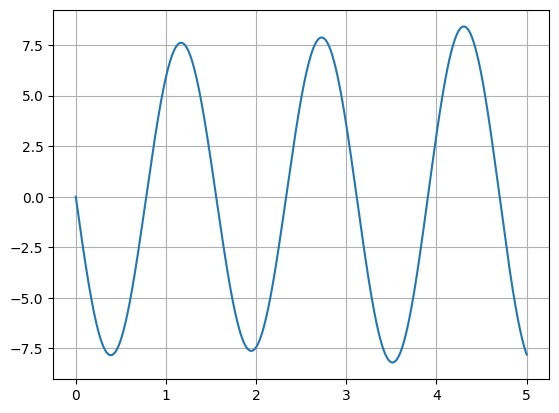

In [ ]:
plt.plot(t,v)
plt.grid()
plt.show()

#Projectile motion
## $x'=3, y'= 4-10t, x(0)=y(0)=0$

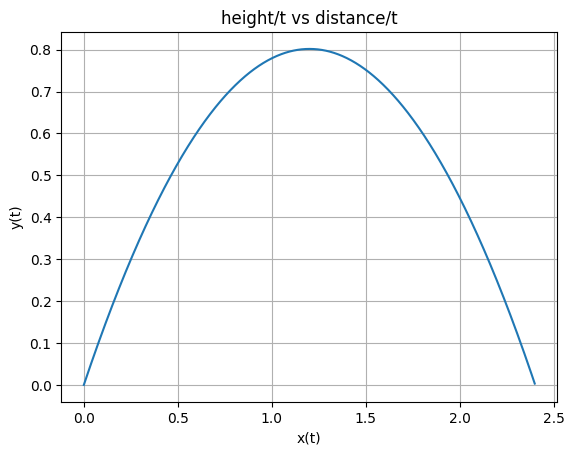

In [ ]:
#The question has 2 equations to consider, x'(t) and y'(t), from which we need to figure out the solutions of x(t) and y(t)
#Unlike the previous question, x and y are not dependant on each other

a = 0
b = 0.8                           # Flight time = 0.8 seconds
N = 1001
h = (b-a)/(N-1)                   # step size, follow this formula
t= np.linspace(a,b,N)             # t is an array ranging from 0 to 0.8

# creating an equal size array, x and y, consisting of all zeroes
x = 0* t
y = 0* t

#iterating for obtaining solutions
for i in range(1,N):
  y[i] = y[i-1] + h*(4-10*t[i-1])             # integrating y numerically & getting the solutions of y
  x[i] = x[i-1] + h*3                         # integrating x numerically & getting the solutions of x


plt.plot(x,y)          # plotting distance y vs x
plt.ylabel('y(t)')
plt.xlabel('x(t)')
plt.title('height/t vs distance/t')
plt.grid()
plt.show()
# y signifies height, x signifies distance
# the graph displays the projectile motion of an object

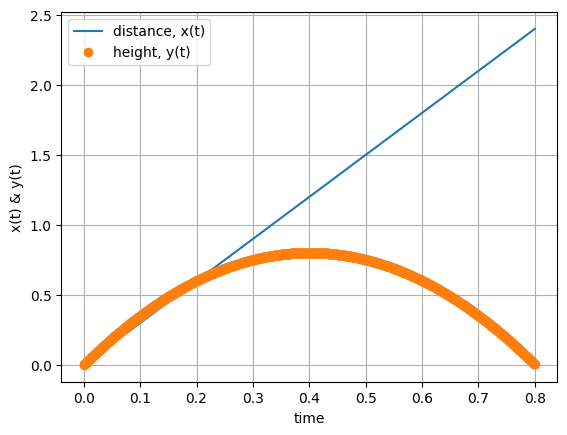

In [ ]:
plt.plot(t,x,'-',label="distance, x(t)")   # plotting distance x vs t
plt.plot(t,y,'o',label="height, y(t)")     # plotting distance y vs t
plt.xlabel('time')
plt.ylabel('x(t) & y(t)')
plt.grid()
plt.legend()
plt.show()

#if you manually integrate x' & y', the asnwers are
# x = 3t + c
# y = 4t + 5t^2 + c


**Solve the initial value problem:**

1. $d
y/
d
x
=
2
x
,
y
(
0
)
=
2$

2. $y
′
=
2
t
(
25
−
y
)
,
y(1) = 1/2$

3.  $y
′′
-
2
y
=
-
2
,
y
(
1
)
=
4
,
y
′
(
2
)
=
5
$

##$\frac{dy}{dx} = -sin(x) , y(0)=1$

In [ ]:
import sympy as smp
y,x= smp.symbols('y x')
y=Function('y')(x)
smp.dsolve(smp.Derivative(y,x)+smp.sin(x))

y(x) = C₁ + cos(x)

In [ ]:
smp.Derivative(y,x)

d    
──(y)
dx   

In [ ]:
a = 0                # starting
b = 10                # ending
N = 1001             # no. of divisions / points
h = (b-a)/(N-1)      # step size, follow this formula

f=lambda x: -np.sin(x)

x = np.linspace(a,b,N)

print(x)

y = 0*x              # creating an equal size array consisting of all zeroes
#print(y)

y[0] = 1            # declaring what we want the initial value to be
#print(y)

#print(x)
#print(y)

for i in range(1,N):                  #figuring out the other values of the given DE
  y[i] = y[i-1] + h*f(x[i-1])           #calculating the next value of y, using the previous value + step*slope
  #print("i:",i,"y[i]:",y[i],"y[i-1]:",y[i-1])     "y[i]:",y[i],"y[i-1]:",y[i-1]

for i in range(0,5):
  print("i:",i,'x[',i,']',x[i],"y[",i,"-1]:",y[i-1],"y[",i,"]:",y[i])


[ 0.    0.01  0.02 ...  9.98  9.99 10.  ]
i: 0 x[ 0 ] 0.0 y[ 0 -1]: -0.8417763090092802 y[ 0 ]: 1.0
i: 1 x[ 1 ] 0.01 y[ 1 -1]: 1.0 y[ 1 ]: 1.0
i: 2 x[ 2 ] 0.02 y[ 2 -1]: 1.0 y[ 2 ]: 0.9999000016666584
i: 3 x[ 3 ] 0.03 y[ 3 -1]: 0.9999000016666584 y[ 3 ]: 0.999700014999725
i: 4 x[ 4 ] 0.04 y[ 4 -1]: 0.999700014999725 y[ 4 ]: 0.9994000599977001
